UMAR HASHMI
SP23-BBD-048
DEEP LEARNING
FINAL PROJECT

In [3]:
!pip install -q tensorflow matplotlib scikit-learn numpy pillow opencv-python pandas seaborn


In [4]:
from google.colab import files
uploaded = files.upload()


Saving archive (8).zip to archive (8).zip


In [6]:
!ls -l
!ls -l /content
!ls -l /mnt/data


total 125644
-rw-r--r-- 1 root root 128654048 Dec 12 13:06 'archive (8).zip'
drwxr-xr-x 1 root root      4096 Dec  9 14:42  sample_data
total 125644
-rw-r--r-- 1 root root 128654048 Dec 12 13:06 'archive (8).zip'
drwxr-xr-x 1 root root      4096 Dec  9 14:42  sample_data
ls: cannot access '/mnt/data': No such file or directory


In [7]:
!unzip -q "/content/archive (8).zip" -d /content/dataset_inspect


In [8]:
!ls -R /content/dataset_inspect


/content/dataset_inspect:
data1a

/content/dataset_inspect/data1a:
training  validation

/content/dataset_inspect/data1a/training:
00-damage  01-whole

/content/dataset_inspect/data1a/training/00-damage:
0001.JPEG  0133.JPEG  0265.JPEG  0397.JPEG  0529.JPEG  0661.JPEG  0793.JPEG
0002.JPEG  0134.JPEG  0266.JPEG  0398.JPEG  0530.JPEG  0662.JPEG  0794.JPEG
0003.JPEG  0135.JPEG  0267.JPEG  0399.JPEG  0531.JPEG  0663.JPEG  0795.JPEG
0004.JPEG  0136.JPEG  0268.JPEG  0400.JPEG  0532.JPEG  0664.JPEG  0796.JPEG
0005.JPEG  0137.JPEG  0269.JPEG  0401.JPEG  0533.JPEG  0665.JPEG  0797.JPEG
0006.JPEG  0138.JPEG  0270.JPEG  0402.JPEG  0534.JPEG  0666.JPEG  0798.JPEG
0007.JPEG  0139.JPEG  0271.JPEG  0403.JPEG  0535.JPEG  0667.JPEG  0799.JPEG
0008.JPEG  0140.JPEG  0272.JPEG  0404.JPEG  0536.JPEG  0668.JPEG  0800.JPEG
0009.JPEG  0141.JPEG  0273.JPEG  0405.JPEG  0537.JPEG  0669.JPEG  0801.JPEG
0010.JPEG  0142.JPEG  0274.JPEG  0406.JPEG  0538.JPEG  0670.JPEG  0802.JPEG
0011.JPEG  0143.jpeg  0275.JPEG  040

In [9]:
DATA_ROOT = "/content/dataset_inspect"


Using DATA_ROOT: /content/dataset_inspect/data1a
Train dir exists: True
Val dir exists:   True
Train subfolders: ['00-damage', '01-whole']
Val subfolders:   ['00-damage', '01-whole']
/content/dataset_inspect/data1a/training/00-damage/0001.JPEG


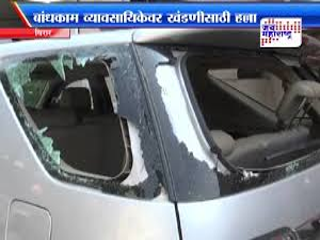

/content/dataset_inspect/data1a/training/00-damage/0002.JPEG


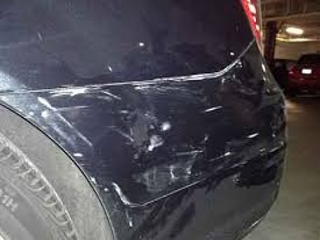

/content/dataset_inspect/data1a/training/01-whole/0001.jpg


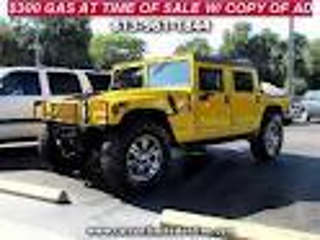

/content/dataset_inspect/data1a/training/01-whole/0002.jpg


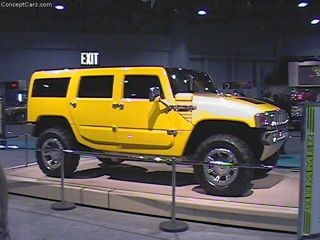

In [10]:
# 1_check_dataset.py - confirm dataset layout and show 4 sample images
import os
from IPython.display import display
from PIL import Image

DATA_ROOT = "/content/dataset_inspect"   # <--- you set this
# attempt to find the deepest folder that contains training/validation
def find_data_root(root):
    # direct children
    if os.path.isdir(os.path.join(root,"training")) or os.path.isdir(os.path.join(root,"train")):
        return root
    for child in sorted(os.listdir(root)):
        p = os.path.join(root, child)
        if os.path.isdir(p):
            if os.path.isdir(os.path.join(p,"training")) or os.path.isdir(os.path.join(p,"train")):
                return p
    return root

root = find_data_root(DATA_ROOT)
print("Using DATA_ROOT:", root)
train_dir = os.path.join(root, "training") if os.path.isdir(os.path.join(root,"training")) else os.path.join(root,"train")
val_dir   = os.path.join(root, "validation") if os.path.isdir(os.path.join(root,"validation")) else os.path.join(root,"valid")

print("Train dir exists:", os.path.isdir(train_dir))
print("Val dir exists:  ", os.path.isdir(val_dir))
print("Train subfolders:", sorted(os.listdir(train_dir)) if os.path.isdir(train_dir) else [])
print("Val subfolders:  ", sorted(os.listdir(val_dir)) if os.path.isdir(val_dir) else [])

# Display up to 4 sample images
samples = []
for sub in sorted(os.listdir(train_dir))[:2]:
    sd = os.path.join(train_dir, sub)
    imgs = [f for f in sorted(os.listdir(sd)) if f.lower().endswith((".jpg",".jpeg",".png"))][:2]
    for im in imgs:
        samples.append(os.path.join(sd, im))

for p in samples:
    print(p)
    display(Image.open(p).resize((320,240)))


Train dir: /content/dataset_inspect/data1a/training
Val dir:   /content/dataset_inspect/data1a/validation
Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.
Detected classes: {'00-damage': 0, '01-whole': 1}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5591 - loss: 0.7037 - val_accuracy: 0.6304 - val_loss: 0.6255
Epoch 2/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6644 - loss: 0.6262 - val_accuracy: 0.6739 - val_loss: 0.6286
Epoch 3/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.6857 - loss: 0.5911 - val_accuracy: 0.6848 - val_loss: 0.5866
Epoch 4/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6798 - loss: 0.5833 - val_accuracy: 0.6391 - val_loss: 0.6901
Epoch 5/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7095 - loss: 0.5793 - val_accuracy: 0.7130 - val_loss: 0.5426
Epoch 6/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7195 - loss: 0.5539 - val_accuracy: 0.7196 - val_loss: 0.5377
Epoch 7/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.7337 - loss: 0.5321 - val_accuracy: 0.7783 - val_loss: 0.4949
Epoch 8/12
58/58 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7474 - loss: 0.5278 - val_accuracy: 0.6761 - val_loss:

Saved model: /content/damage_cnn_binary.h5
Saved class indices: /content/class_indices_binary.json
Saved training plot: /content/training_plot_binary.png
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 383ms/step
Classification Report:
              precision    recall  f1-score   support

   00-damage       0.74      0.83      0.79       230
    01-whole       0.81      0.71      0.76       230

    accuracy                           0.77       460
   macro avg       0.78      0.77      0.77       460
weighted avg       0.78      0.77      0.77       460

Confusion Matrix:\n [[192  38]
 [ 67 163]]
Saved confusion matrix: /content/confusion_binary.png


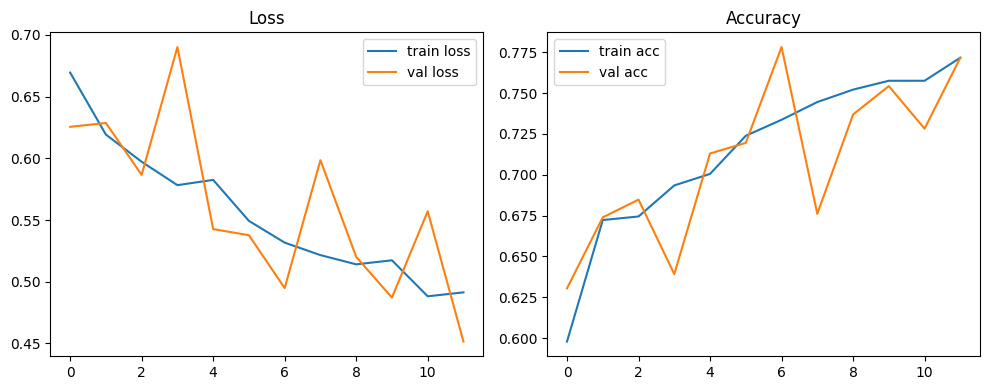

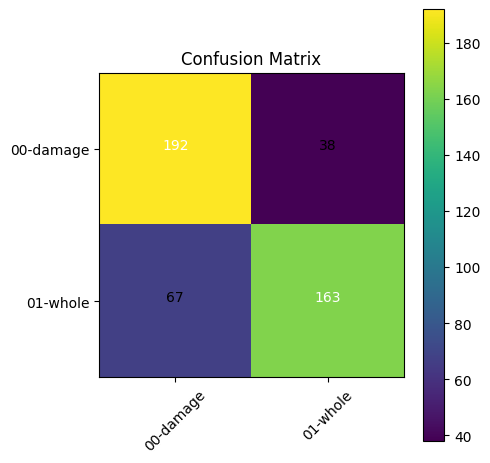

In [11]:
# train_binary.py - Simple CNN for Damage vs No-Damage (binary)
import os, json, itertools
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix

# ---------- CONFIG ----------
DATA_ROOT = "/content/dataset_inspect"   # <--- your value
# common names the script will search for (it will try root then one level below)
POSSIBLE_TRAIN = ["train", "training", "Train", "Training"]
POSSIBLE_VAL   = ["valid", "validation", "val", "validation_set"]

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 12

MODEL_SAVE = "/content/damage_cnn_binary.h5"
CLASS_IND_SAVE = "/content/class_indices_binary.json"
OUTPUT_PLOT = "/content/training_plot_binary.png"
OUTPUT_CM   = "/content/confusion_binary.png"

# ---------- helper to find train/val dirs ----------
def find_dir(root, candidates):
    for c in candidates:
        p = os.path.join(root, c)
        if os.path.isdir(p):
            return p
    return None

train_dir = find_dir(DATA_ROOT, POSSIBLE_TRAIN)
val_dir   = find_dir(DATA_ROOT, POSSIBLE_VAL)
# try one level deeper if not found
if (train_dir is None) or (val_dir is None):
    for child in sorted(os.listdir(DATA_ROOT)):
        chp = os.path.join(DATA_ROOT, child)
        if os.path.isdir(chp):
            t = find_dir(chp, POSSIBLE_TRAIN)
            v = find_dir(chp, POSSIBLE_VAL)
            if t and v:
                train_dir, val_dir = t, v
                break

if train_dir is None or val_dir is None:
    raise SystemExit("Could not find train/validation folders. Edit DATA_ROOT or folder names.")

print("Train dir:", train_dir)
print("Val dir:  ", val_dir)

# ---------- Data generators ----------
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
val_gen = ImageDataGenerator(rescale=1./255)

train_flow = train_gen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)
val_flow = val_gen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# ---------- Model ----------
def build_simple_cnn(input_shape=(128,128,3), num_classes=2):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation="softmax")
    ])
    return model

num_classes = len(train_flow.class_indices)
print("Detected classes:", train_flow.class_indices)
model = build_simple_cnn(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), num_classes=num_classes)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# ---------- Train ----------
early = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
history = model.fit(train_flow, validation_data=val_flow, epochs=EPOCHS, callbacks=[early])

# ---------- Save ----------
model.save(MODEL_SAVE)
json.dump(train_flow.class_indices, open(CLASS_IND_SAVE, "w"))
print("Saved model:", MODEL_SAVE)
print("Saved class indices:", CLASS_IND_SAVE)

# ---------- Plots ----------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend(); plt.title("Loss")
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend(); plt.title("Accuracy")
plt.tight_layout()
plt.savefig(OUTPUT_PLOT)
print("Saved training plot:", OUTPUT_PLOT)

# ---------- Evaluate ----------
val_flow.reset()
steps = int(np.ceil(val_flow.samples / val_flow.batch_size))
pred_probs = model.predict(val_flow, steps=steps, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_flow.classes
class_names = list(val_flow.class_indices.keys())

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\\n", cm)

plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix"); plt.colorbar()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names, rotation=45); plt.yticks(ticks, class_names)
th = cm.max() / 2.
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment='center',
             color='white' if cm[i,j] > th else 'black')
plt.tight_layout()
plt.savefig(OUTPUT_CM)
print("Saved confusion matrix:", OUTPUT_CM)


In [13]:
%%writefile train_binary.py
# ------------------ Simple CNN Binary Classifier ------------------
import os, json, itertools
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix

DATA_ROOT = "/content/dataset_inspect"   # your dataset location

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 12

MODEL_SAVE = "/content/damage_cnn_binary.h5"
CLASS_IND_SAVE = "/content/class_indices_binary.json"
OUTPUT_PLOT = "/content/training_plot_binary.png"
OUTPUT_CM   = "/content/confusion_binary.png"

# ---------- find train & val folders ----------
def find_dir(root, names):
    for n in names:
        p = os.path.join(root, n)
        if os.path.isdir(p):
            return p
    return None

train_dir = find_dir(DATA_ROOT, ["training", "train"])
val_dir   = find_dir(DATA_ROOT, ["validation", "valid", "val"])

if train_dir is None or val_dir is None:
    # also check one-level deeper (your case)
    for child in os.listdir(DATA_ROOT):
        cpath = os.path.join(DATA_ROOT, child)
        if os.path.isdir(cpath):
            t = find_dir(cpath, ["training", "train"])
            v = find_dir(cpath, ["validation", "valid", "val"])
            if t and v:
                train_dir, val_dir = t, v
                break

print("TRAIN DIRECTORY:", train_dir)
print("VALID DIRECTORY:", val_dir)

# ---------- data generators ----------
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

val_gen = ImageDataGenerator(rescale=1./255)

train_flow = train_gen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_flow = val_gen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# ---------- build CNN ----------
def build_cnn(input_shape=(128,128,3), classes=2):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(classes, activation='softmax')
    ])
    return model

num_classes = len(train_flow.class_indices)
print("CLASSES:", train_flow.class_indices)

model = build_cnn(classes=num_classes)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# ---------- train ----------
early = callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
history = model.fit(train_flow, validation_data=val_flow, epochs=EPOCHS, callbacks=[early])

# ---------- save ----------
model.save(MODEL_SAVE)
json.dump(train_flow.class_indices, open(CLASS_IND_SAVE, "w"))
print("MODEL SAVED:", MODEL_SAVE)
print("CLASS INDEX SAVED:", CLASS_IND_SAVE)

# ---------- training plots ----------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy"); plt.legend()

plt.tight_layout()
plt.savefig(OUTPUT_PLOT)
print("TRAINING PLOT SAVED:", OUTPUT_PLOT)

# ---------- evaluation ----------
val_flow.reset()
pred = model.predict(val_flow)
y_pred = np.argmax(pred, axis=1)
y_true = val_flow.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(train_flow.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.savefig(OUTPUT_CM)
print("CONFUSION MATRIX SAVED:", OUTPUT_CM)


Writing train_binary.py


In [14]:
!python train_binary.py


2025-12-12 13:38:15.666307: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765546695.706252   50464 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765546695.718232   50464 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765546695.752967   50464 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765546695.753028   50464 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765546695.753040   50464 computation_placer.cc:177] computation placer alr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Predicted: 01-whole (confidence: 0.85)


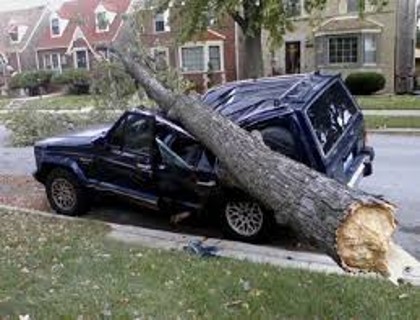

In [16]:
# predict_binary.py - single image predictor for the binary model
import os, sys, json, numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from IPython.display import display
from PIL import Image

MODEL_PATH = "/content/damage_cnn_binary.h5"
CLASS_IND_PATH = "/content/class_indices_binary.json"
IMG_SIZE = (128,128)

if not os.path.exists(MODEL_PATH) or not os.path.exists(CLASS_IND_PATH):
    raise SystemExit("Model or class indices not found. Run training first.")

model = load_model(MODEL_PATH)
class_map = json.load(open(CLASS_IND_PATH))
inv_map = {v:k for k,v in class_map.items()}
CLASS_NAMES = [inv_map[i] for i in range(len(inv_map))]

def predict(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, 0)
    probs = model.predict(x)[0]
    idx = int(np.argmax(probs))
    return CLASS_NAMES[idx], float(probs[idx])

# To run in Colab, provide a direct path to an image.
# For example, let's use an image from the validation set.
img_path = "/content/dataset_inspect/data1a/validation/00-damage/0001.JPEG"

label, conf = predict(img_path)
print(f"Predicted: {label} (confidence: {conf:.2f})")
# show image inline (Colab)
display(Image.open(img_path).resize((420,320)))

In [17]:
!python predict_binary.py "/content/dataset_inspect/data1a/validation/00-damage/0001.JPEG"


python3: can't open file '/content/predict_binary.py': [Errno 2] No such file or directory


In [18]:
%%writefile predict_binary.py
import os, sys, json, numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from IPython.display import display
from PIL import Image

MODEL_PATH = "/content/damage_cnn_binary.h5"
CLASS_IND_PATH = "/content/class_indices_binary.json"
IMG_SIZE = (128,128)

# load model and class map
if not os.path.exists(MODEL_PATH) or not os.path.exists(CLASS_IND_PATH):
    raise SystemExit("Model or class index file not found. Train the model first.")

model = load_model(MODEL_PATH)
class_map = json.load(open(CLASS_IND_PATH))
inv_map = {v:k for (k,v) in class_map.items()}
CLASS_NAMES = [inv_map[i] for i in range(len(inv_map))]

def predict(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, 0)
    probs = model.predict(x)[0]
    idx = int(np.argmax(probs))
    return CLASS_NAMES[idx], float(probs[idx])

if __name__ == "__main__":
    # Remove unwanted Colab flags like "-f"
    args = [a for a in sys.argv[1:] if not a.startswith("-")]

    if len(args) < 1:
        print("Usage: python predict_binary.py path/to/image.jpg")
        sys.exit(0)

    img_path = args[0]
    label, conf = predict(img_path)
    print(f"\nPredicted class: {label}")
    print(f"Confidence: {conf:.2f}")

    # show image
    display(Image.open(img_path).resize((420,320)))


Writing predict_binary.py


In [19]:
!python predict_binary.py "/content/dataset_inspect/data1a/validation/00-damage/0001.JPEG"


2025-12-12 13:59:36.437494: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765547976.527273   55731 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765547976.541187   55731 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765547976.585113   55731 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765547976.585231   55731 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765547976.585243   55731 computation_placer.cc:177] computation placer alr

In [20]:
!pip install -q gradio


In [21]:
%%writefile app_gradio.py
import os, json, numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

# Paths (change only if needed)
MODEL_PATH = "/content/damage_cnn_binary.h5"
CLASS_IND_PATH = "/content/class_indices_binary.json"
IMG_SIZE = (128,128)

# Load model + class mapping
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model not found at {MODEL_PATH}. Train first.")
if not os.path.exists(CLASS_IND_PATH):
    raise FileNotFoundError(f"Class indices not found at {CLASS_IND_PATH}. Train first.")

model = load_model(MODEL_PATH)
class_map = json.load(open(CLASS_IND_PATH))
inv_map = {v:k for (k,v) in class_map.items()}
CLASS_NAMES = [inv_map[i] for i in range(len(inv_map))]

def preprocess_pil(img: Image.Image, target_size=(128,128)):
    # Ensure RGB
    if img.mode != "RGB":
        img = img.convert("RGB")
    # Optionally pad to square (keeps aspect)
    # img = ImageOps.pad(img, (max(img.size), max(img.size)))
    img = img.resize(target_size)
    arr = np.array(img).astype("float32") / 255.0
    arr = np.expand_dims(arr, 0)
    return arr

def predict_gradio(pil_img):
    """Input: PIL image from Gradio. Output: (label, confidence, probs dict)."""
    x = preprocess_pil(pil_img, target_size=IMG_SIZE)
    probs = model.predict(x)[0]
    idx = int(np.argmax(probs))
    label = CLASS_NAMES[idx]
    confidence = float(probs[idx])
    # Also return a dict of class->prob for a nicer UI
    prob_dict = {CLASS_NAMES[i]: float(probs[i]) for i in range(len(probs))}
    return label, round(confidence, 4), prob_dict

# If user runs this file directly, launch gradio UI
if __name__ == "__main__":
    import gradio as gr
    title = "Vehicle Damage Detector — Damage vs No-Damage"
    description = "Upload an image of a car part. The model returns whether it contains damage."
    iface = gr.Interface(
        fn=predict_gradio,
        inputs=gr.Image(type="pil", label="Upload image"),
        outputs=[
            gr.Label(num_top_classes=2, label="Predicted Label & Confidence"),
            gr.JSON(label="All class probabilities")
        ],
        title=title,
        description=description,
        examples=None,  # you can add example file paths here like [["/content/...jpg"]]
        allow_flagging="never"
    )
    # share=True creates a public link (works in Colab). Set to False if not needed.
    iface.launch(share=True)


Writing app_gradio.py


In [23]:
!python app_gradio.py


2025-12-12 14:25:07.193937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765549507.218783   61957 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765549507.225981   61957 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765549507.245134   61957 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765549507.245193   61957 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765549507.245199   61957 computation_placer.cc:177] computation placer alr